In [1]:
import numpy as np
import scipy.special as sci
import matplotlib
%matplotlib inline

In [2]:
with open('mnist_train.csv', 'r') as f:
    training_file = f.readlines()

training_data = []
for line in training_file:
    line = line.split(',')
    training_data.append([int(line[0]), [int(num) / 255 * 0.98 + 0.01 for num in line[1:]]])
    
with open('mnist_train_100.csv', 'r') as f:
    testing_file = f.readlines()
    
testing_data = []
for line in testing_file:
    line = line.split(',')
    num = int(line[0])
    testing_data.append([int(line[0]), [int(num) / 255 * 0.98 + 0.01 for num in line[1:]]])


In [3]:
expected_nums = {
    0: [0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
    1: [0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
    2: [0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
    3: [0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
    4: [0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01, 0.01],
    5: [0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01],
    6: [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01],
    7: [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01],
    8: [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01],
    9: [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.99]
}

In [4]:
from neuralnetwork import NeuralNetwork as NN
num_net = NN(784, 100, 10, 0.2)

for data in training_data:
    num_net.train(data[1], expected_nums[data[0]])


Guess: 9, Target: 1
Number likelihood: [ 0.00712785  0.33588585  0.03126609  0.51189048  0.11470513  0.02402641
  0.00827124  0.0088126   0.00722357  0.67982526]
Guess: 8, Target: 7
Number likelihood: [ 0.00118303  0.06701533  0.01883116  0.00026436  0.04488952  0.03453071
  0.00227509  0.14364991  0.16769402  0.06848821]
Guess: 3, Target: 9
Number likelihood: [ 0.00064798  0.02801467  0.00105108  0.48574229  0.00155466  0.01639642
  0.00053738  0.00293841  0.01663867  0.16256961]
Guess: 0, Target: 9
Number likelihood: [ 0.47613779  0.00201673  0.00122687  0.0087603   0.00238515  0.03995467
  0.03948022  0.02525995  0.1631105   0.00118429]
Performance: 4.0% error rate
Performance: 96.0% accuracy


Human viewable:
Guess: 1, Target: 1


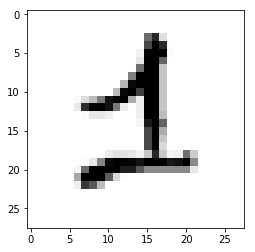

In [15]:
correct = 0
images = []
for i in range(len(testing_data)):
    test_input = testing_data[i]
    nn_output = num_net.query(test_input[1])
    guess = np.argmax(nn_output)

    if guess == test_input[0]:
        correct += 1
    else:
        images.append(np.array(test_input[1]).reshape(28, 28))
        print('Guess: '+str(guess)+', Target: '+str(test_input[0]))
        print('Number likelihood: '+str(nn_output))

correctness = float(correct/len(testing_data))*100
print('Performance: '+str(100 - correctness)+'% error rate')
print('Performance: '+str(correctness)+'% accuracy')

print('\n\nHuman viewable:')
print('Guess: '+str(guess)+', Target: '+str(test_input[0]))
matplotlib.pyplot.imshow(images[0], cmap='Greys', interpolation='None')
# print('Accuracy: '+str(correct)+'%')

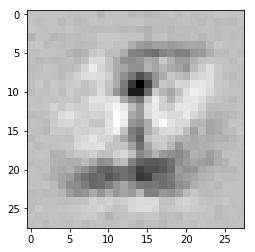

In [10]:
result = num_net.thought_process(expected_nums[1])
img = result.reshape(28, 28)
matplotlib.pyplot.imshow(img, cmap='Greys', interpolation='None')